<a href="https://colab.research.google.com/github/HVBLEGENDZZ9/BASICS-OF-DEEP-LEARNING/blob/main/Convolutional_Neural_Networks_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**GETTING OUR DATA**
HERE, WE WILL USE A SIMPLIFIED VERSION OF THE FOOD 101 DATASET THAT HAS ONLY PICTURES OF STEAK AND PIZZA

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zf = zipfile.ZipFile("pizza_steak.zip")
zf.extractall()
zf.close()

--2021-10-25 11:24:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.74.128, 209.85.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   154MB/s    in 0.7s    

2021-10-25 11:24:18 (154 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



###**BECOMING ONE WITH THE DATA**

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [6]:
import os
for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print(f"THERE ARE {len(dirnames)} DIRECTORIES AND {len(filenames)} IMAGES")

THERE ARE 2 DIRECTORIES AND 1 IMAGES
THERE ARE 2 DIRECTORIES AND 1 IMAGES
THERE ARE 0 DIRECTORIES AND 750 IMAGES
THERE ARE 0 DIRECTORIES AND 750 IMAGES
THERE ARE 2 DIRECTORIES AND 1 IMAGES
THERE ARE 0 DIRECTORIES AND 250 IMAGES
THERE ARE 0 DIRECTORIES AND 250 IMAGES


In [7]:
!ls -la pizza_steak #the .DS_Store is extra

total 24
drwxr-xr-x 4 root root 4096 Oct 25 11:24 .
drwxr-xr-x 1 root root 4096 Oct 25 11:24 ..
-rw-r--r-- 1 root root 6148 Oct 25 11:24 .DS_Store
drwxr-xr-x 4 root root 4096 Oct 25 11:24 test
drwxr-xr-x 4 root root 4096 Oct 25 11:24 train


In [8]:
#another way of finding the number of images in the dataset
number_of_images = len(os.listdir("pizza_steak/train/pizza"))
number_of_images_test = len(os.listdir("pizza_steak/test/pizza"))
number_of_images,number_of_images_test

(750, 250)

###**GETTING CLASS NAMES**

In [9]:
#programatically getting the class names
import pathlib
import numpy as np
dir  = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in dir.glob("*")]))
print(class_names)

['.DS_Store' 'pizza' 'steak']


In [10]:
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


###**LETS VISUALIZE OUR IMAGES**

['13983.jpg']
IMAGE SHAPE: (384, 512, 3)


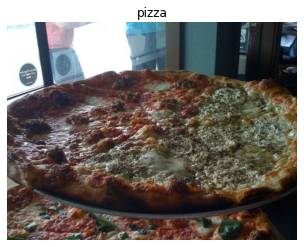

<Figure size 2160x1800 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def plot_random_image(target_folder,target_class):
  target = target_folder + '/' + target_class
  rand_img = random.sample(os.listdir(target),1)
  print(rand_img)
  img = mpimg.imread(target + '/' + rand_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  plt.figure(figsize=(30,25))
  print(f'IMAGE SHAPE: {img.shape}')
  return img
img = plot_random_image("pizza_steak/train","pizza")

In [12]:
import tensorflow as tf
#we can see that our image has already been converted to rgb values
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[253, 252, 250],
        [255, 252, 253],
        [255, 254, 255],
        ...,
        [ 77,  94, 112],
        [ 72,  89, 105],
        [ 37,  54,  70]],

       [[255, 254, 252],
        [255, 255, 253],
        [255, 255, 253],
        ...,
        [ 63,  80,  98],
        [ 66,  83,  99],
        [ 45,  62,  78]],

       [[254, 254, 252],
        [254, 254, 252],
        [255, 255, 253],
        ...,
        [ 99, 116, 134],
        [112, 129, 145],
        [110, 127, 143]],

       ...,

       [[ 60,  83,  29],
        [ 48,  68,  17],
        [ 42,  61,  15],
        ...,
        [  7,  12,  16],
        [ 12,  17,  21],
        [  8,  13,  17]],

       [[ 27,  49,   3],
        [ 35,  56,  13],
        [ 24,  42,   4],
        ...,
        [ 18,  23,  27],
        [  0,   5,   9],
        [ 11,  16,  20]],

       [[ 33,  54,  15],
        [ 34,  54,  17],
        [ 40,  57,  23],
        ...,
        [ 10,  15,  1

###**PREPROCESSING DATA**

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train = ImageDataGenerator(rescale=1/255.,validation_split=0.25)
test = ImageDataGenerator(rescale=1/255.)
traindir = "/content/pizza_steak/train"
testdir = "/content/pizza_steak/test"
train_data = train.flow_from_directory(directory = traindir,
                                       target_size = (224,224),
                                       class_mode = "binary",
                                       seed = 42,
                                       subset = "training")
validation_data = train.flow_from_directory(directory=traindir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            seed=42,
                                            subset="validation")
test_data = test.flow_from_directory(directory=testdir,
                                     target_size=(224,224),
                                     class_mode = "binary",
                                     seed=42)

Found 1126 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [14]:
len(train_data),1126/32

(36, 35.1875)

###**BUILDING A CNN**
*  STANFORD ARTICLE: https://cs231n.github.io/convolutional-networks/
*  CNN EXPLAINER: https://poloclub.github.io/cnn-explainer/

In [15]:
import tensorflow as tf
model1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters = 10,kernel_size=3,input_shape=(224,224,3),activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
  tf.keras.layers.Conv2D(filters = 10,kernel_size=3,input_shape=(224,224,3),activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")
])
model1.compile(loss = tf.keras.losses.BinaryCrossentropy(),optimizer = tf.keras.optimizers.Adam(),metrics = ["accuracy"])
#don't forget to connect to a GPU before training CNNs 
history1 = model1.fit(train_data,epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=validation_data,
                      validation_steps = len(validation_data))

Epoch 1/10
36/36 [==============================] - 41s 271ms/step - loss: 0.7115 - accuracy: 0.5657 - val_loss: 0.6486 - val_accuracy: 0.6925
Epoch 2/10
36/36 [==============================] - 9s 251ms/step - loss: 0.5474 - accuracy: 0.7202 - val_loss: 0.5737 - val_accuracy: 0.7380
Epoch 3/10
36/36 [==============================] - 9s 250ms/step - loss: 0.4713 - accuracy: 0.7851 - val_loss: 0.5289 - val_accuracy: 0.7567
Epoch 4/10
36/36 [==============================] - 9s 250ms/step - loss: 0.4303 - accuracy: 0.8064 - val_loss: 0.5359 - val_accuracy: 0.7594
Epoch 5/10
36/36 [==============================] - 9s 252ms/step - loss: 0.4265 - accuracy: 0.8135 - val_loss: 0.5344 - val_accuracy: 0.7460
Epoch 6/10
36/36 [==============================] - 9s 254ms/step - loss: 0.3630 - accuracy: 0.8481 - val_loss: 0.5174 - val_accuracy: 0.7674
Epoch 7/10
36/36 [==============================] - 9s 260ms/step - loss: 0.3234 - accuracy: 0.8712 - val_loss: 0.5379 - val_accuracy: 0.7540
Epoch

In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

###**EVALUATION OF OUR MODEL**

In [17]:
model1.evaluate(test_data)

16/16 [==============================] - 3s 193ms/step - loss: 0.5310 - accuracy: 0.8220


[0.5309798121452332, 0.8220000267028809]

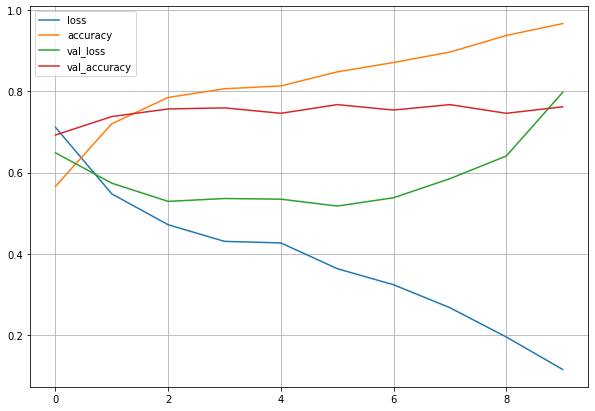

In [18]:
import pandas as pd
pd.DataFrame(history1.history).plot(figsize=(10,7))
plt.grid(True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


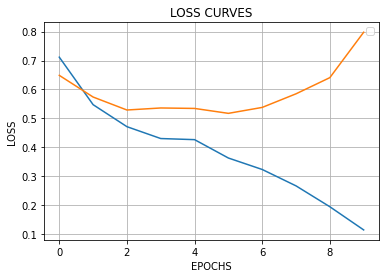

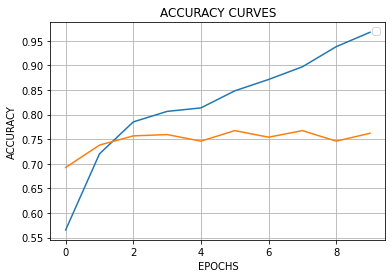

In [19]:
def plot_loss_accuracy_curves(history):
  validation_loss = history.history["val_loss"]
  validation_accuracy = history.history["val_accuracy"]
  training_loss = history.history["loss"]
  training_accuracy = history.history["accuracy"]
  epochs = range(len(history.history["loss"]))
  #plotting taining loss vs validation loss
  plt.plot(epochs,training_loss)
  plt.plot(epochs,validation_loss)
  plt.xlabel("EPOCHS")
  plt.ylabel("LOSS")
  plt.title("LOSS CURVES")
  plt.grid(True)
  plt.legend()
  #plotting training accuracy vs validation accuracy
  plt.figure()
  plt.plot(epochs,training_accuracy)
  plt.plot(epochs,validation_accuracy)
  plt.xlabel("EPOCHS")
  plt.ylabel("ACCURACY")
  plt.title("ACCURACY CURVES")
  plt.grid(True)
  plt.legend();
plot_loss_accuracy_curves(history1)

*WHEN WE SEE THAT OUR MODEL'S TRAINING LOSS IS GOING DOWN BUT IT'S VALIDATION LOSS IS INCREASING, IT MEANS THAT OUR MODEL MAYBE OVERFITTING THE DATA*

###**USING DATA AUGUMENTATION TO REDUCE OVERFITTING**

In [40]:
train_data_augumented = ImageDataGenerator(rescale=1/255.,
                                rotation_range=0.2,
                                zoom_range=0.2,
                                shear_range=0.2,
                                height_shift_range=0.2,
                                width_shift_range=0.2,
                                horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255.)
train_non_aug = train.flow_from_directory(directory = traindir,
                                       target_size = (224,224),
                                       class_mode = "binary",
                                       seed = 42,
                                       shuffle=False)
train_augument = train_data_augumented.flow_from_directory("pizza_steak/train",
                                                           class_mode="binary",
                                                           shuffle=False,
                                                           target_size=(224,224),
                                                           seed=42)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


###**VISUALIZING OUR AUGUMENTED DATA**

Text(0.5, 1.0, 'AUGUMENTED IMAGE')

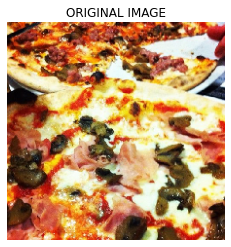

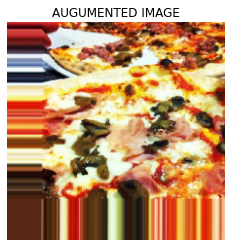

In [44]:
img_aug,label_aug = train_augument.next()
img,label = train_non_aug.next()
import random
i = random.randint(0,32)
plt.imshow(img[i])
plt.axis(False)
plt.title("ORIGINAL IMAGE")
plt.figure()
plt.imshow(img_aug[i])
plt.axis(False)
plt.title("AUGUMENTED IMAGE")

###**TRAINING ON OUR AUGUMENTED DATA WITHOUT SHUFFLING**

In [51]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D

In [54]:
model2 = Sequential([
  Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
  MaxPool2D(),
  Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
  MaxPool2D(),
  Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")
])
model2.compile(loss="binary_crossentropy",optimizer=Adam(),metrics="accuracy")
history2 = model2.fit(train_augument,epochs=10,
                      steps_per_epoch=len(train_augument),
                      validation_data =test_data,
                      validation_steps=len(test_data))
#training on augumented data takes time since the data is first augumented and then passed to the model for training

Epoch 1/10
47/47 [==============================] - 29s 601ms/step - loss: 0.7106 - accuracy: 0.4940 - val_loss: 0.6742 - val_accuracy: 0.5120
Epoch 2/10
47/47 [==============================] - 28s 596ms/step - loss: 0.6842 - accuracy: 0.5640 - val_loss: 0.6467 - val_accuracy: 0.6800
Epoch 3/10
47/47 [==============================] - 28s 588ms/step - loss: 0.6724 - accuracy: 0.5700 - val_loss: 0.6137 - val_accuracy: 0.6400
Epoch 4/10
47/47 [==============================] - 28s 588ms/step - loss: 0.6745 - accuracy: 0.5953 - val_loss: 0.6367 - val_accuracy: 0.5920
Epoch 5/10
47/47 [==============================] - 28s 598ms/step - loss: 0.6582 - accuracy: 0.5993 - val_loss: 0.5595 - val_accuracy: 0.7360
Epoch 6/10
47/47 [==============================] - 28s 599ms/step - loss: 0.6166 - accuracy: 0.6613 - val_loss: 0.5339 - val_accuracy: 0.7880
Epoch 7/10
47/47 [==============================] - 28s 598ms/step - loss: 0.6015 - accuracy: 0.6933 - val_loss: 0.5278 - val_accuracy: 0.7440

###**TRAINING WITH SHUFFLING**

In [55]:
train_augument = train_data_augumented.flow_from_directory("pizza_steak/train",
                                                           class_mode="binary",
                                                           shuffle=True,
                                                           target_size=(224,224),
                                                           seed=42)

Found 1500 images belonging to 2 classes.


In [56]:
model3 = Sequential([
  Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
  MaxPool2D(),
  Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
  MaxPool2D(),
  Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")
])
model3.compile(loss="binary_crossentropy",optimizer=Adam(),metrics="accuracy")
history3 = model2.fit(train_augument,epochs=10,
                      steps_per_epoch=len(train_augument),
                      validation_data =test_data,
                      validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 28s 601ms/step - loss: 0.4922 - accuracy: 0.7840 - val_loss: 0.3551 - val_accuracy: 0.8500
Epoch 2/10
47/47 [==============================] - 28s 596ms/step - loss: 0.4657 - accuracy: 0.7880 - val_loss: 0.3512 - val_accuracy: 0.8580
Epoch 3/10
47/47 [==============================] - 28s 597ms/step - loss: 0.4648 - accuracy: 0.7800 - val_loss: 0.3348 - val_accuracy: 0.8560
Epoch 4/10
47/47 [==============================] - 28s 600ms/step - loss: 0.4478 - accuracy: 0.8080 - val_loss: 0.3309 - val_accuracy: 0.8560
Epoch 5/10
47/47 [==============================] - 28s 602ms/step - loss: 0.4452 - accuracy: 0.7920 - val_loss: 0.3299 - val_accuracy: 0.8620
Epoch 6/10
47/47 [==============================] - 28s 595ms/step - loss: 0.4378 - accuracy: 0.8033 - val_loss: 0.3203 - val_accuracy: 0.8600
Epoch 7/10
47/47 [==============================] - 28s 596ms/step - loss: 0.4114 - accuracy: 0.8267 - val_loss: 0.3150 - val_accuracy: 0.8680

###**COMPRING MODEL2 AND MODEL1**
* WE CAN SEE THAT SHUFFLING OUR DATA HAS LED TO A BETTER ACCURACY

In [58]:
model2.evaluate(test_data)

16/16 [==============================] - 3s 172ms/step - loss: 0.3322 - accuracy: 0.8500


[0.3322436809539795, 0.8500000238418579]

In [59]:
model3.evaluate(test_data)

16/16 [==============================] - 3s 172ms/step - loss: 0.6983 - accuracy: 0.4360


[0.6983116865158081, 0.4359999895095825]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


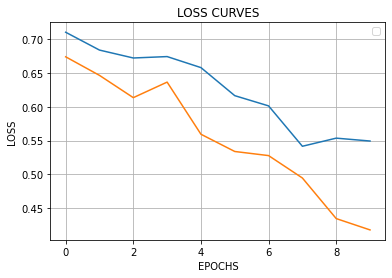

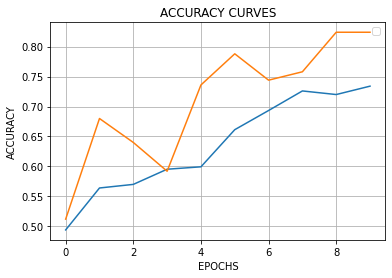

In [60]:
plot_loss_accuracy_curves(history2)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


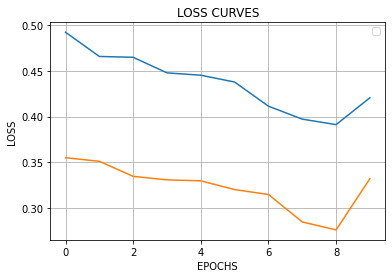

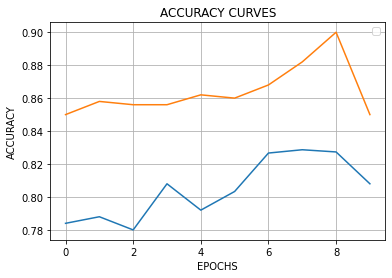

In [62]:
plot_loss_accuracy_curves(history3)

###**GIVING OUR MODEL A CUSTOM INPUT**

In [65]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-10-25 13:25:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-10-25 13:25:16 (30.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



In [69]:
steak = mpimg.imread("/content/03-steak.jpeg")
steak.shape

(4032, 3024, 3)

Text(0.5, 1.0, 'STEAK')

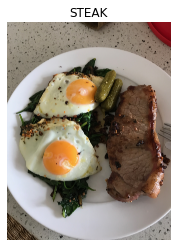

In [70]:
plt.imshow(steak)
plt.axis(False)
plt.title("STEAK")

In [85]:
def load_prep_img(filename,img_size=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img,size=[img_size,img_size])
  img = img/255.
  img = tf.expand_dims(img,axis=0)
  return img

In [110]:
def plot_predictions(image,class_names,prediction):
  plt.imshow(image)
  plt.axis(False)
  plt.title(f'PREDICTION: {class_names[int(prediction)]}')

In [111]:
y = model2.predict(load_prep_img("03-steak.jpeg"))

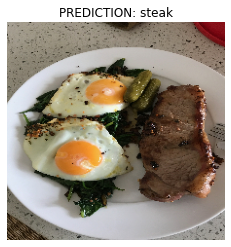

In [112]:
plot_predictions(tf.squeeze(load_prep_img("03-steak.jpeg")),class_names,y.round())